In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('data/train.csv')

In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,pymnt_plan,...,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,issue_d_le,earliest_cr_line_le
0,15000.0,0,11.99,498.15,1,7,4,70000.0,1,0,...,1,0,0,0,0,0,0,1,2013.750000,1991.916667
1,3725.0,0,6.03,113.38,0,0,0,52260.0,1,0,...,1,0,0,0,0,0,1,0,2012.750000,2000.750000
2,16000.0,0,11.14,524.89,1,6,3,67500.0,1,0,...,0,0,0,0,1,0,1,0,2013.250000,2001.500000
3,4200.0,0,13.33,142.19,2,12,1,21600.0,0,0,...,1,0,0,0,0,1,0,0,2015.166667,2003.333333
4,6500.0,0,12.69,218.05,1,9,10,41000.0,1,0,...,0,0,0,0,1,1,0,0,2012.000000,1990.666667


In [29]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,pymnt_plan,...,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,issue_d_le,earliest_cr_line_le
count,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,2.001890e+05,200189.000000,200189.000000,...,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000,200189.000000
mean,13660.968260,0.231226,13.877760,420.482277,1.839896,11.176983,5.673054,7.237452e+04,0.777570,0.000030,...,0.490931,0.000165,0.000505,0.087627,0.420767,0.334399,0.298793,0.366808,2013.407917,1998.132613
std,8170.415321,0.421618,4.426724,245.688125,1.349909,6.666391,3.616477,5.737515e+04,0.415879,0.005475,...,0.499919,0.012838,0.022456,0.282753,0.493684,0.471781,0.457730,0.481935,1.410772,7.011496
min,500.000000,0.000000,5.320000,15.690000,0.000000,0.000000,0.000000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.416667,1946.000000
25%,7500.000000,0.000000,10.990000,242.550000,1.000000,6.000000,2.000000,4.500000e+04,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.666667,1994.750000
50%,12000.000000,0.000000,13.660000,367.130000,2.000000,10.000000,6.000000,6.200000e+04,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.583333,1999.500000
75%,18700.000000,0.000000,16.780000,549.740000,3.000000,15.000000,10.000000,8.700000e+04,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2014.500000,2002.833333
max,35000.000000,1.000000,28.990000,1424.570000,6.000000,34.000000,10.000000,8.706582e+06,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.916667,2012.750000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 43 columns):
loan_amnt                     200189 non-null float64
term                          200189 non-null int64
int_rate                      200189 non-null float64
installment                   200189 non-null float64
grade                         200189 non-null int32
sub_grade                     200189 non-null int32
emp_length                    200189 non-null int32
annual_inc                    200189 non-null float64
loan_status                   200189 non-null int64
pymnt_plan                    200189 non-null int32
purpose                       200189 non-null int32
zip_code                      200189 non-null int32
addr_state                    200189 non-null int32
dti                           200189 non-null float64
delinq_2yrs                   200189 non-null float64
inq_last_6mths                200189 non-null float64
mths_since_last_delinq        200189 non-nu

In [6]:
df.emp_length.fillna(value=0,inplace=True)
df.revol_util.fillna(value=0,inplace=True)
df.collections_12_mths_ex_med.fillna(value=df.collections_12_mths_ex_med.mean(),inplace=True)
df.mths_since_last_delinq.fillna(value=df.mths_since_last_delinq.mean(),inplace=True)
df.tot_coll_amt.fillna(value=df.tot_coll_amt.mean(),inplace=True)
df.tot_cur_bal.fillna(value=df.tot_coll_amt.mean(),inplace=True)
df.total_rev_hi_lim.fillna(value=df.total_rev_hi_lim.mean(),inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
df['term'] = pd.factorize(df['term'])[0]

In [7]:
df['is_title_known'] = df['emp_title'].map(lambda x: 0 if x == 'n/a' else 1)
df.drop('emp_title', axis=1, inplace=True)

In [8]:
df['zip_code'] = df['zip_code'].where(df['zip_code'].str.len() == 4, 
                                               df['zip_code'].str[:3])
df['zip_code'] = df['zip_code'].astype(int)

In [9]:
label_encoder = LabelEncoder()
categorical_columns = df[['grade','sub_grade','pymnt_plan','initial_list_status','purpose','application_type','addr_state']]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
one_hot_encoded_home_ownership = pd.get_dummies(df.home_ownership)
df = df.drop('home_ownership',axis = 1)

df = df.join(one_hot_encoded_home_ownership)

In [11]:
one_hot_encoded_verification_status = pd.get_dummies(df.verification_status)
df = df.drop('verification_status',axis = 1)

df = df.join(one_hot_encoded_verification_status)

In [12]:
def month_to_decimal(month):
    month_dict = {'Jan':0, 'Feb':1/12., 'Mar':2/12., 'Apr':3/12., 'May':4/12., 'Jun':5/12., 
     'Jul':6/12., 'Aug':7/12., 'Sep':8/12., 'Oct':9/12., 'Nov':10/12., 'Dec':11/12.}
    return month_dict[month]

def convert_date(month_year):
    month_and_year = month_year.split('-')
    return float(month_and_year[1]) + month_to_decimal(month_and_year[0])

def encode_with_func(df, column_name, func_name):
    df[column_name+'_le'] = df[column_name].map(func_name)
    df.drop(column_name, axis=1, inplace=True)

encode_with_func(df, 'issue_d', convert_date)

In [13]:
encode_with_func(df, 'earliest_cr_line', convert_date)

In [14]:
Y = df['loan_status'].values

X = df.drop(['loan_status'], axis=1)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X, Y)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1', random_state = 42)
classifier.fit(x_train,y_train)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(penalty = 'l2', random_state = 42)
classifier1.fit(x_train,y_train)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
y_pred1 = classifier1.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm1 = confusion_matrix(y_test,y_pred1)

In [21]:
cm

array([[30356, 16277],
       [15813, 30951]], dtype=int64)

In [22]:
cm1

array([[30359, 16274],
       [15812, 30952]], dtype=int64)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6564129468826622
Precision: 0.6553527568391632
Recall: 0.661855273287144


In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.6564557748107541
Precision: 0.6554016855122179
Recall: 0.6618766572577196


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65     46633
           1       0.66      0.66      0.66     46764

   micro avg       0.66      0.66      0.66     93397
   macro avg       0.66      0.66      0.66     93397
weighted avg       0.66      0.66      0.66     93397



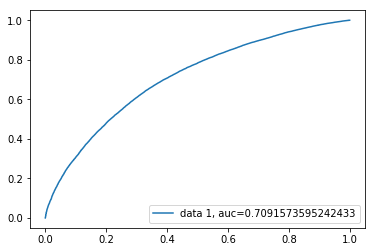

In [26]:
y_pred_proba = classifier1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()